In [25]:
#import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

wine = pd.read_csv('dataComplex-20-10-10-16.csv', sep=',')
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69200 entries, 0 to 69199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pressure  69200 non-null  int64  
 1   temp      69200 non-null  int64  
 2   CH4_P     69200 non-null  float64
 3   H2_P      69200 non-null  float64
 4   O2_P      69200 non-null  float64
 5   N2_P      69200 non-null  float64
 6   ER        69200 non-null  float64
 7   oh        69200 non-null  float64
 8   ho2       69200 non-null  float64
 9   tau1      69200 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 5.3 MB


In [26]:
np.where(np.isnan(wine))

(array([], dtype=int64), array([], dtype=int64))

In [27]:
pd.isnull(wine).sum() > 0
#wine.replace([np.inf, -np.inf], np.nan, inplace=True)

wine.replace([np.inf, -np.inf], np.nan).dropna(how="all")

,pressure,temp,CH4_P,H2_P,O2_P,N2_P,ER,oh,ho2,tau1
0,101325,1000,1.000000,0.000000,1.0,3.760,2.000000,9.260000e-13,1.060000e-08,10.000
1,101325,1000,1.000000,0.000000,1.2,4.512,1.666667,9.530000e-13,9.330000e-09,10.000
2,101325,1000,1.000000,0.000000,1.4,5.264,1.428571,9.740000e-13,8.320000e-09,10.000
3,101325,1000,1.000000,0.000000,1.6,6.016,1.250000,9.910000e-13,7.510000e-09,10.000
4,101325,1000,1.000000,0.000000,1.8,6.768,1.111111,1.010000e-12,6.830000e-09,10.000
...,...,...,...,...,...,...,...,...,...,...
69195,4660950,1950,0.333333,0.666667,1.0,3.800,1.600000,4.440650e-04,1.307010e-04,0.007
69196,4660950,1950,0.333333,0.666667,1.0,3.800,1.700000,3.690490e-04,1.231280e-04,0.008
69197,4660950,1950,0.333333,0.666667,1.0,3.800,1.800000,3.112870e-04,1.162520e-04,0.008
69198,4660950,1950,0.333333,0.666667,1.0,3.800,1.900000,2.658770e-04,1.100030e-04,0.008


In [28]:
np.all(np.isfinite(wine))

True

In [29]:
np.any(np.isnan(wine))

False

[1250. 1300. 1500. ... 1850. 1850. 1300.]
0.9937415491679319
0.23355031846969032


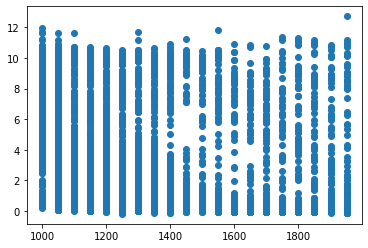

In [30]:
X = wine.drop('tau1', axis=1)
y = wine['tau1']

#train and test splitting of data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


#apply scaler to opt
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

mlpc = MLPRegressor(activation='relu', solver='lbfgs',alpha=0.001, hidden_layer_sizes=(30,30,30), max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)
#print(pred_mlpc)
X_temp = sc.inverse_transform(X_test)[:, 1]
print(X_temp)
print(r2_score(y_test, pred_mlpc))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, pred_mlpc)))
plt.scatter(X_temp, pred_mlpc)
